In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.style
import matplotlib.patches as patches
import numpy as np
matplotlib.style.use('ggplot')

import util

In [5]:
WIDTH, HEIGHT = 40, 30
V_INF = 5 - 4j
A = 10
B = 5
C = np.sqrt(A**2 - B**2)
GAMMA = 0

def transform(z):
    if z.real > 0:
        return (z + np.sqrt(z**2 - C**2)) / (A + B)
    else:
        return (z - np.sqrt(z**2 - C**2)) / (A + B)

def velocity_ellipse(z):
    if z.real > 0:
        return (1 + z / np.sqrt(z**2 - C**2)) * (V_INF - np.conj(V_INF) * (1/transform(z))**2) / (A + B) + GAMMA / np.sqrt(z**2 - C**2) / (2j * np.pi)
    else:
        return (1 - z / np.sqrt(z**2 - C**2)) * (V_INF - np.conj(V_INF) * (1/transform(z))**2) / (A + B) - GAMMA / np.sqrt(z**2 - C**2) / (2j * np.pi)


def mask_ellipse(z):
    return np.abs(z - C) + np.abs(z + C) <= 2 * A

picture_ellipse = patches.Ellipse((0, 0), 2* A, 2 *B, color='g')

In [6]:
import importlib
importlib.reload(util)

<module 'util' from 'C:\\Users\\RSBat\\PycharmProjects\\tfcv-extreme-tasks\\util.py'>

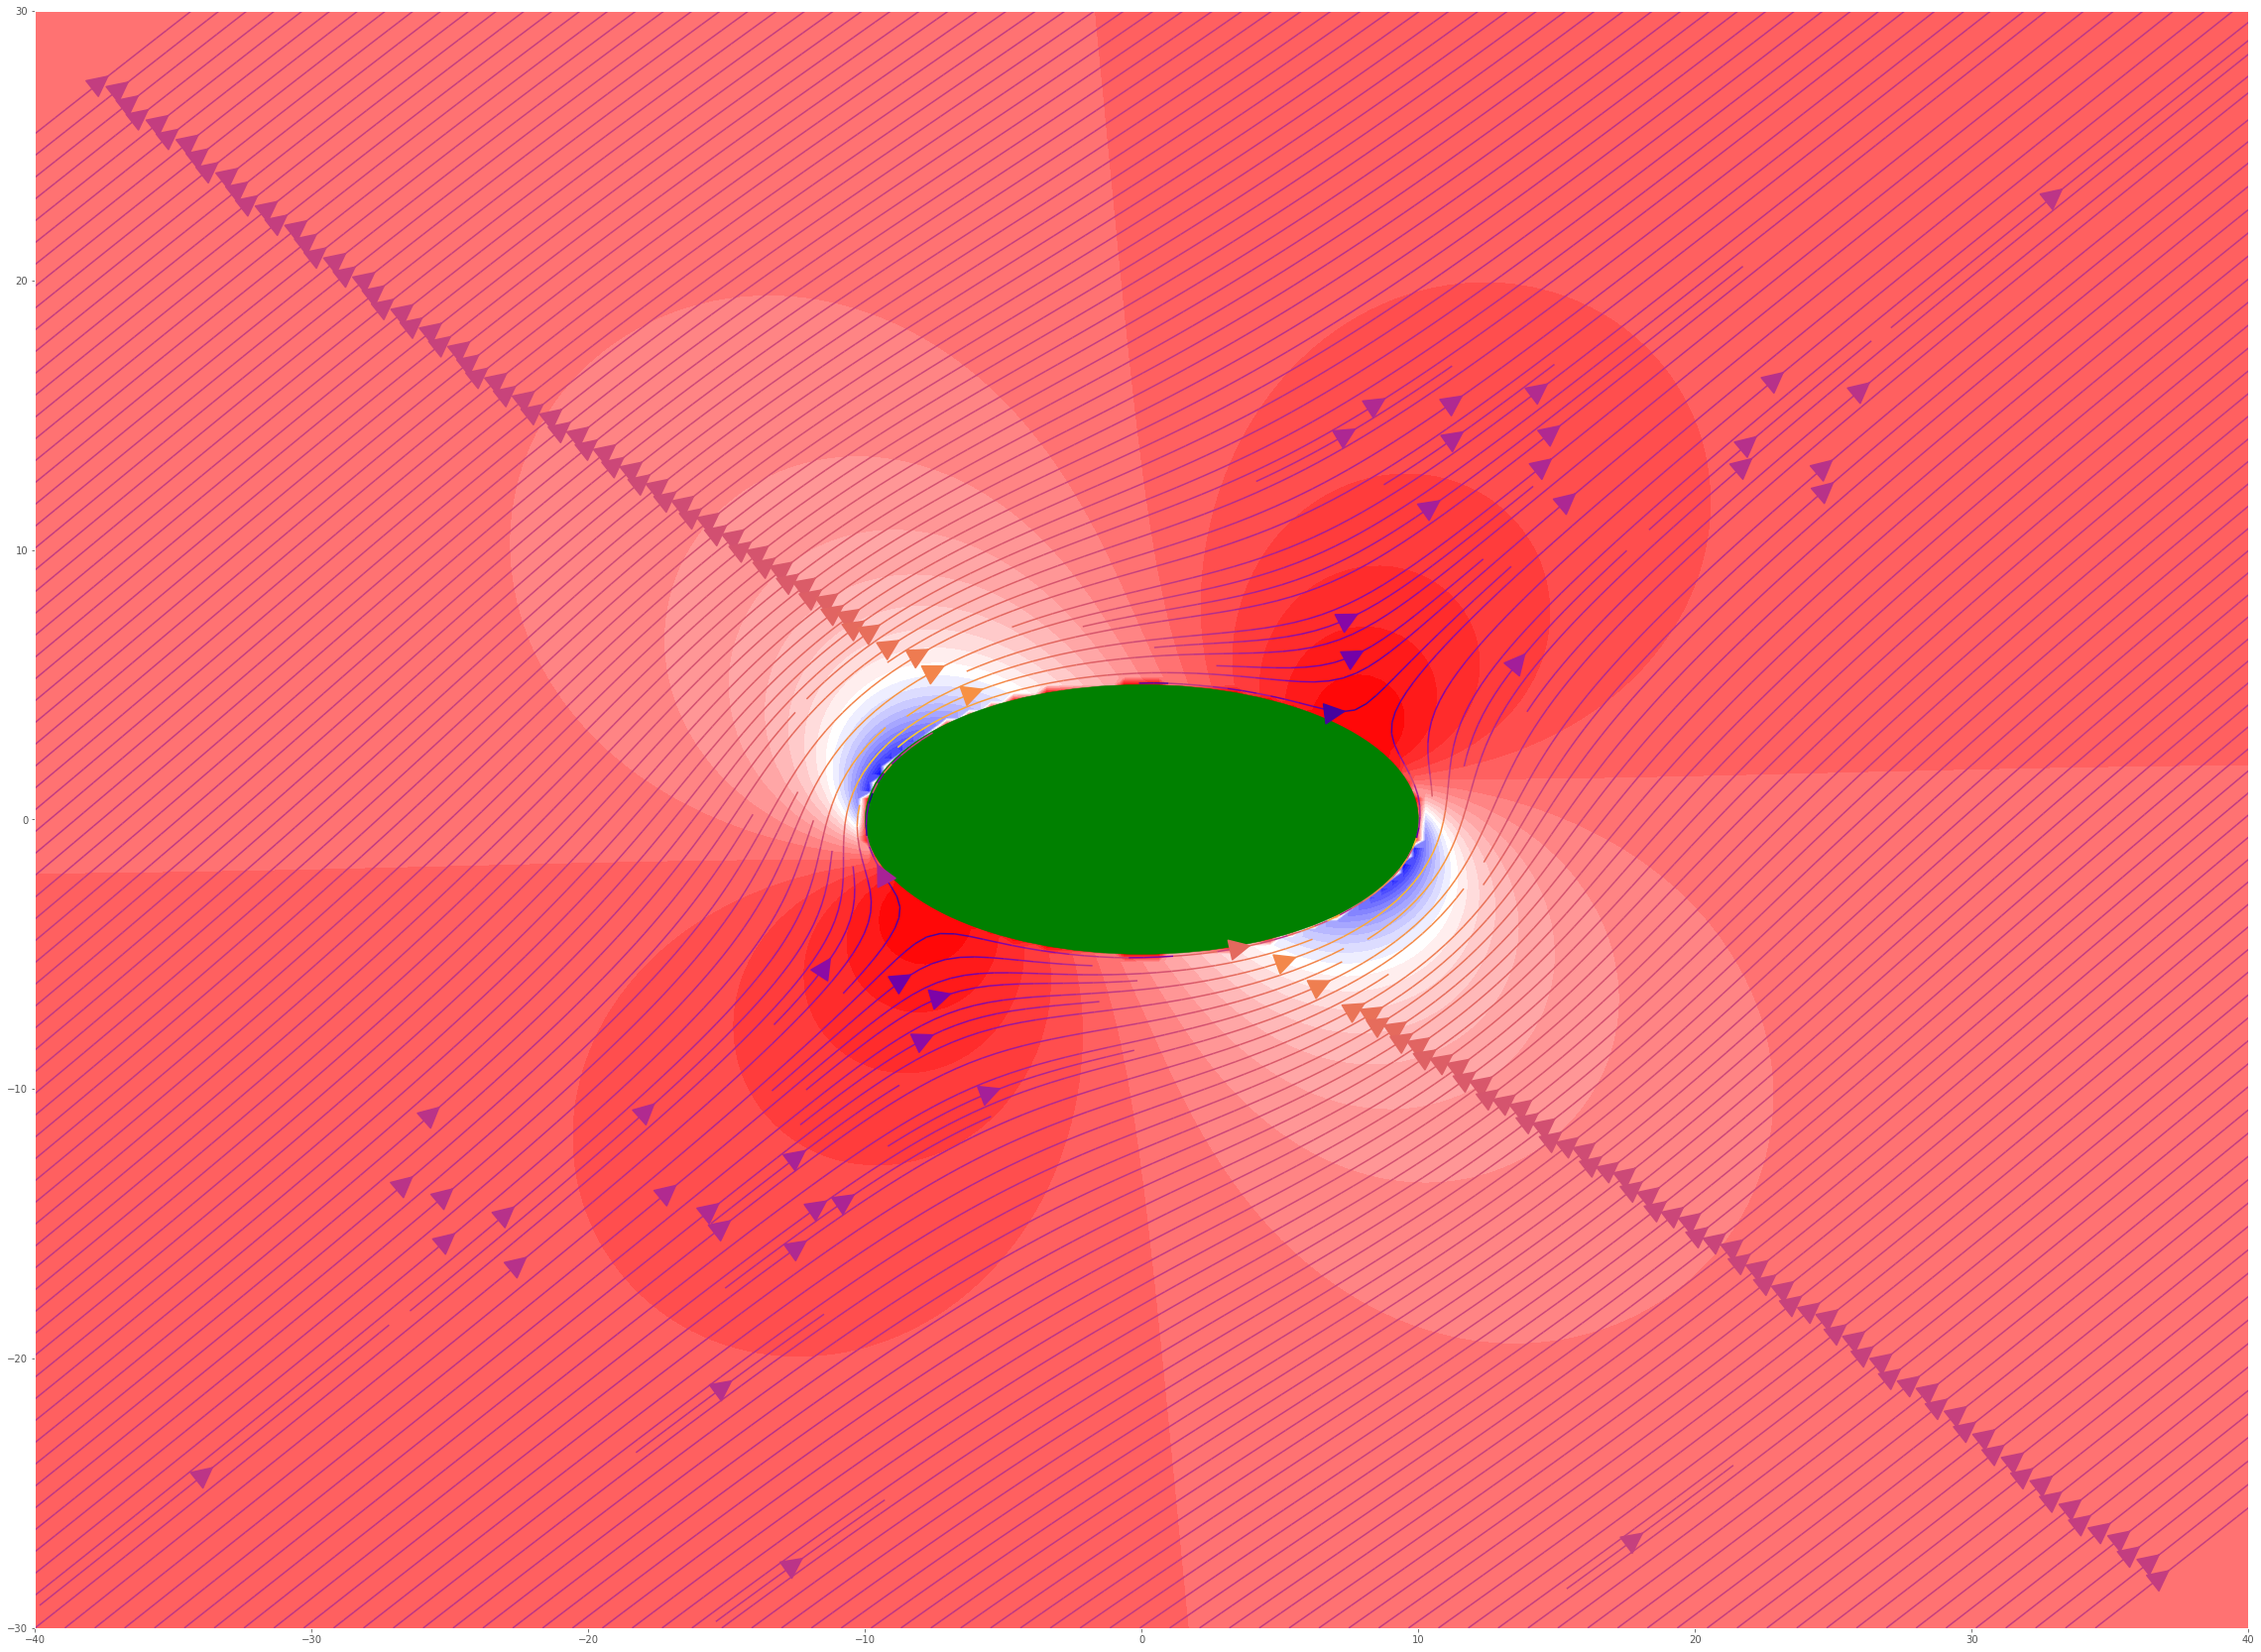

In [7]:
util.show_stream(WIDTH, HEIGHT, velocity_ellipse, mask_ellipse, picture_ellipse, True)